In [3]:
import csv
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression

In [4]:
#PROD FILE: CSV TO DF

origdf = pd.read_csv('testData.csv')
origdf.dropna(axis = 1, how = 'all', inplace = True)

In [5]:
origdf.head()

,Sentence,QorA
0,Did his mother die of pneumonia,1
1,Is it derived from the Latin spoken by the rom...,1
2,Why did Bequerel win the Nobel Prize in Physics,1
3,Where is Jakarta located,1
4,"9 screens, but felt that was too much of a sa...",0


## **EXPLORATORY DATA ANALYSIS**

In [6]:
import seaborn as sns
import matplotlib as plt

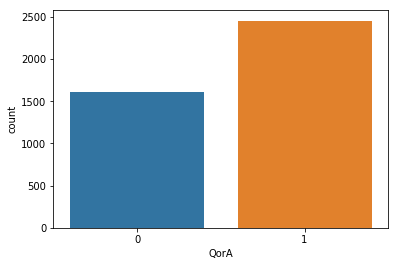

In [7]:
sns.countplot(x = origdf['QorA'], data = origdf)
# 0 is Statement
# 1 is Question

Models

In [40]:
from sklearn import linear_model
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [ ]:
# votingClassifier with gridSearch 
# tune tfidf and count vectorizer too (no n-grams / bi-grams)

In [43]:
cv_logPipe = Pipeline([('cv', CountVectorizer(analyzer = 'word', binary= True)),('logreg', linear_model.LogisticRegression())])


In [44]:
cv_mnbPipe = Pipeline([('cv', CountVectorizer(analyzer = 'word', binary= True)),('mnb', MultinomialNB())])

In [46]:
tfidf_mnbPipe = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', smooth_idf = 1)),('mnb', MultinomialNB())])

In [48]:
tfidf_logPipe = Pipeline([('tfidf', TfidfVectorizer(analyzer = 'word', smooth_idf = 1)),('logreg', linear_model.LogisticRegression())])



In [49]:
classifiers = [("cv_log", cv_logPipe), ("cv_mnb", cv_mnbPipe),("tfidf_mnb", tfidf_mnbPipe), ("tfidf_log", tfidf_logPipe)]

mixed_pipe = Pipeline([("voting", VotingClassifier(classifiers, voting="soft"))])


In [50]:
from sklearn.model_selection import GridSearchCV

In [60]:
def combinations_on_off(num_classifiers):
    return [[int(x) for x in list("{0:0b}".format(i).zfill(num_classifiers))]
            for i in range(1, 2 ** num_classifiers)]


param_grid = dict(
    voting__weights=combinations_on_off(len(classifiers))
)

In [61]:

grid_search = GridSearchCV(mixed_pipe, param_grid=param_grid, n_jobs=-1, verbose=10, scoring="f1", cv= 10)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(origdf['Sentence'], origdf['QorA'], test_size = 0.33)

In [63]:
grid_search.fit(x_train, y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.0s finished
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver wi

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('voting', VotingClassifier(estimators=[('cv_log', Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_...warm_start=False))]))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'voting__weights': [[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 1, 1], [0, 1, 0, 0], [0, 1, 0, 1], [0, 1, 1, 0], [0, 1, 1, 1], [1, 0, 0, 0], [1, 0, 0, 1], [1, 0, 1, 0], [1, 0, 1, 1], [1, 1, 0, 0], [1, 1, 0, 1], [1, 1, 1, 0], [1, 1, 1, 1]]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=10)

In [64]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)

{'voting__weights': [0, 0, 0, 1]} 0.9867211068425771
{'voting__weights': [0, 0, 1, 0]} 0.9938844525075584
{'voting__weights': [0, 0, 1, 1]} 0.9945224953305378
{'voting__weights': [0, 1, 0, 0]} 0.9901578378548065
{'voting__weights': [0, 1, 0, 1]} 0.9932593372400313
{'voting__weights': [0, 1, 1, 0]} 0.9920240207514691
{'voting__weights': [0, 1, 1, 1]} 0.9938795941011663
{'voting__weights': [1, 0, 0, 0]} 0.9912252359292587
{'voting__weights': [1, 0, 0, 1]} 0.9909076729205086
{'voting__weights': [1, 0, 1, 0]} 0.9942237316804949
{'voting__weights': [1, 0, 1, 1]} 0.993914937950237
{'voting__weights': [1, 1, 0, 0]} 0.9941846471208646
{'voting__weights': [1, 1, 0, 1]} 0.9932952158147441
{'voting__weights': [1, 1, 1, 0]} 0.994800008750926
{'voting__weights': [1, 1, 1, 1]} 0.994204003692919


In [ ]:
##ROUGH

''''
def threeSplit_SortData(train, test, validate):
    train_q = train['Sentence']
    test_q = test['Sentence']
    val_q = validate['Sentence']
    train_rest = train.copy().drop(['Sentence','QorA'], axis = 1)
    test_rest = test.copy().drop(['Sentence','QorA'], axis = 1)
    val_rest = validate.copy().drop(['Sentence','QorA'], axis = 1)
    train_ans = train['QorA']
    test_ans = test['QorA']
    val_ans = validate['QorA']
    return train_q, test_q, val_q, train_rest, test_rest, val_rest, train_ans, test_ans, val_ans
    
    
#SPLIT PROD FILE INTO TRAIN, TEST, VALIDATION SECTIONS

#def threeSplit_DataSet(whole):
#    train, validate, test = np.split(whole.sample(frac = 1), [int(0.6*len(whole)), int(0.8*len(whole))])
#    return train, validate, test

def train_validate_test_split(df, train_percent=.6, validate_percent=.2):
    #np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    test = df.ix[perm[validate_end:]]
    return train, validate, test
    
def tenfold(x_train, x_test, y_train, y_test, clf,p):
    ##x_train, x_test, y_train, y_test = train_test_split(vecountdf, origdf['QorA'], test_size = 0.33)
    clfgrid = GridSearchCV(clf,p, cv=10)
    clfgrid.fit(x_train, y_train)
    x_pred = clfgrid.predict(x_test)
    return x_pred, clfgrid
